<a href="https://colab.research.google.com/github/CarlosOliv71/Pos-Graduacao-de-Ciencia-de-Dados-da-Unicarioca/blob/main/Grupo_4_Atividade_01_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Barcelona

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *trabalho*, vamos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Barcelona (good for visualisations).*
* disponível em: https://insideairbnb.com/barcelona/


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group_cleansed,neighbourhood,latitude,longitude,room_type,price,minimum_nights,maximum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,"Barcelona, CT, Spain",4.140.556,217.262,Entire home/apt,194.0,1,1125,42,2024-06-03,0.31,28,72,3,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,"Sant Adria de Besos, Barcelona, Spain",4.141.243.172.529.060,2.219.750.335.269.470,Entire home/apt,304.0,3,32,79,2024-06-24,0.48,1,116,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,"Barcelona, Catalonia, Spain",4.140.566,217.015,Entire home/apt,211.0,1,31,128,2024-09-05,0.80,3,319,32,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,NaN,4.138.062,217.517,Entire home/apt,300.0,5,120,20,2024-08-20,0.12,3,69,12,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,"Barcelona, Catalonia, Spain",4.137.978,217.623,Entire home/apt,314.0,5,365,247,2024-09-02,1.46,3,241,37,HUTB-150671


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 19482 entradas e 75 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 19482
Entradas:	 19



,0
id,object
name,object
host_id,int64
host_name,object
neighbourhood_group_cleansed,object
neighbourhood,object
latitude,object
longitude,object
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood` tem quase metade (48,47%) dos seus valores faltantes.
* A coluna `license` tem quase um terço de informações faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente um quarto das linhas.
* A variável `price` têm aproximadamente 21% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood,0.484755
license,0.317935
reviews_per_month,0.243866
last_review,0.243866
price,0.208397
host_name,0.000103
neighbourhood_group_cleansed,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, vamos plotar o histograma.

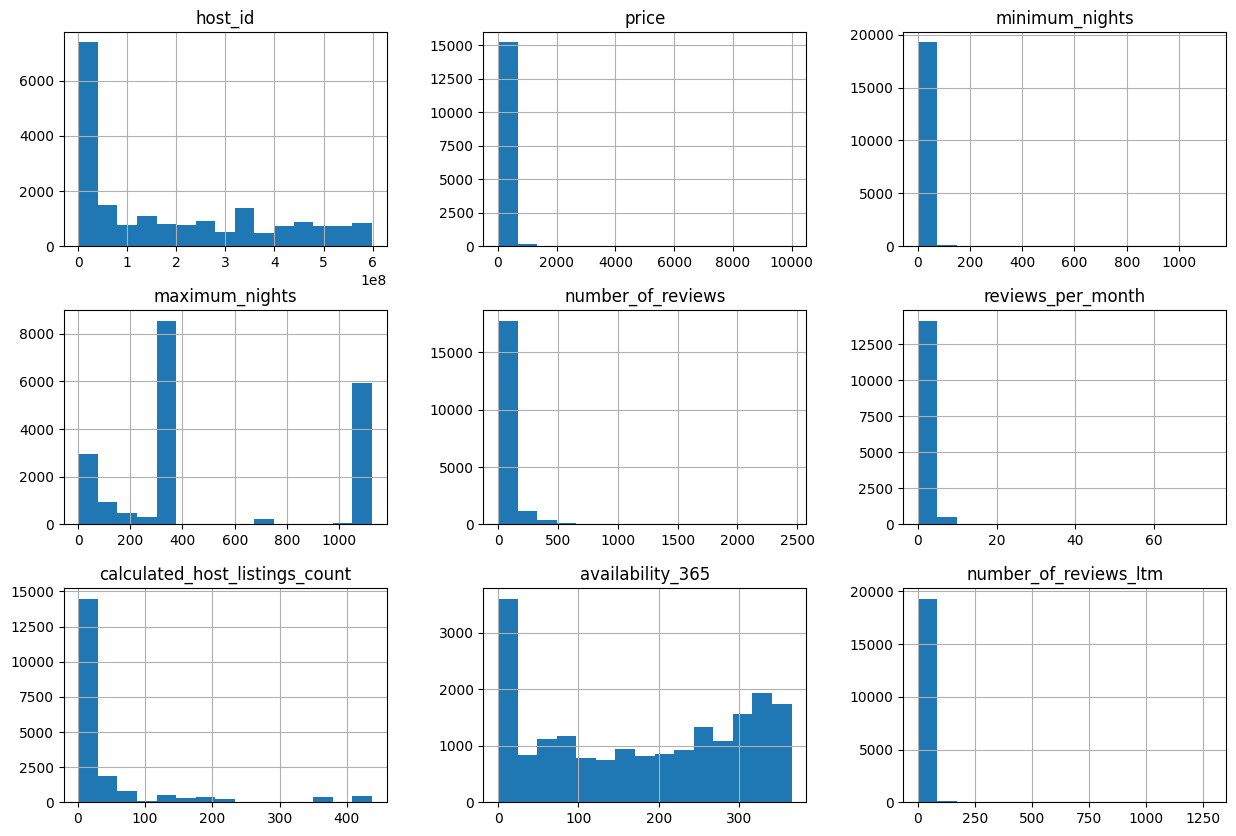

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* nas variáveis `price`, `minimum_nights`, `maximum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15422.000000,19482.000000,19482.000000,19482.000000,14731.000000,19482.000000,19482.000000
mean,168.633575,15.393799,531.582743,47.606714,1.518737,41.368237,177.206704
std,262.686362,30.786373,415.556273,99.350461,2.074713,88.454600,125.322884
min,8.000000,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,66.000000,1.000000,330.000000,1.000000,0.230000,1.000000,59.000000
50%,128.000000,3.000000,365.000000,7.000000,0.870000,6.000000,183.000000
75%,212.000000,31.000000,1125.000000,48.000000,2.270000,33.000000,300.000000
max,9999.000000,1124.000000,1125.000000,2453.000000,74.630000,437.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 212, porém seu valor máximo é 9999.
* Existem anfitriões com 437 imóveis (`calculated_host_listings_count`).
* 50% dos imóveis têm menos de 1 review por mês (`reviews_per_month`)  e no máximo 7 reviews no total (`number_of_reviews`) .
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.


#### Boxplot para minimum_nights

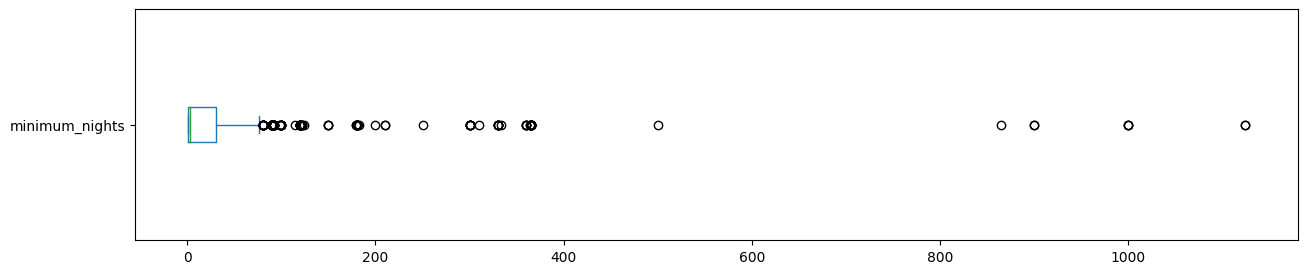

minimum_nights: valores acima de 30:
6932 entradas
35.5816%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para maximum_nights

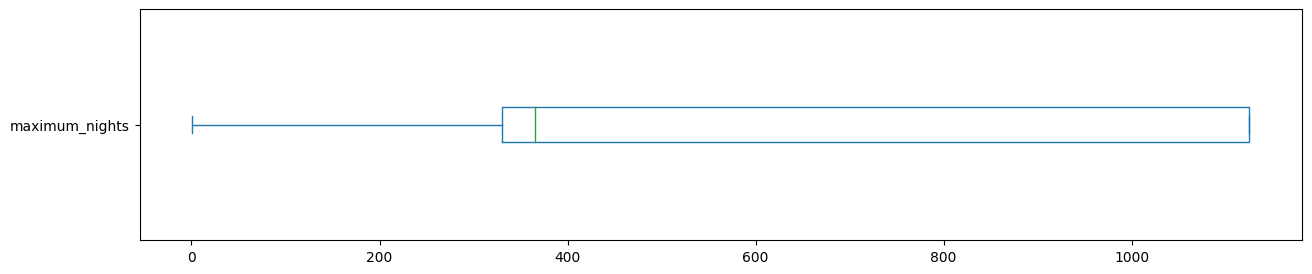

maximum_nights: valores acima de 30:
17699 entradas
90.8480%


In [ ]:
# maximum_nights
df.maximum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para maximum_nights
print("maximum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.maximum_nights > 30])))
print("{:.4f}%".format((len(df[df.maximum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

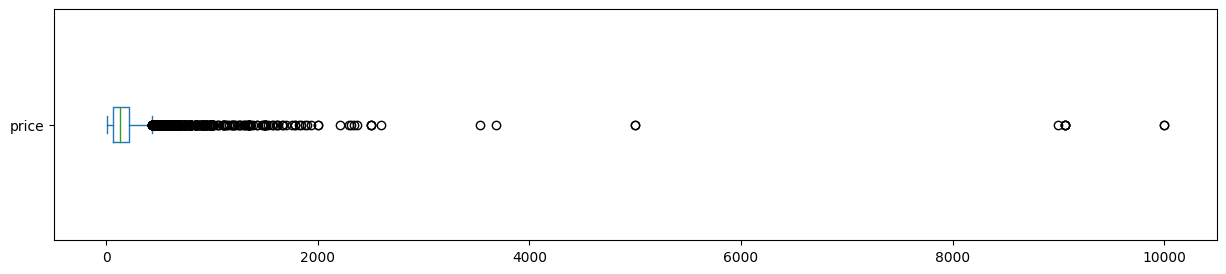


price: valores acima de 1500
40 entradas
0.2053%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* e plotar novamente o histograma.

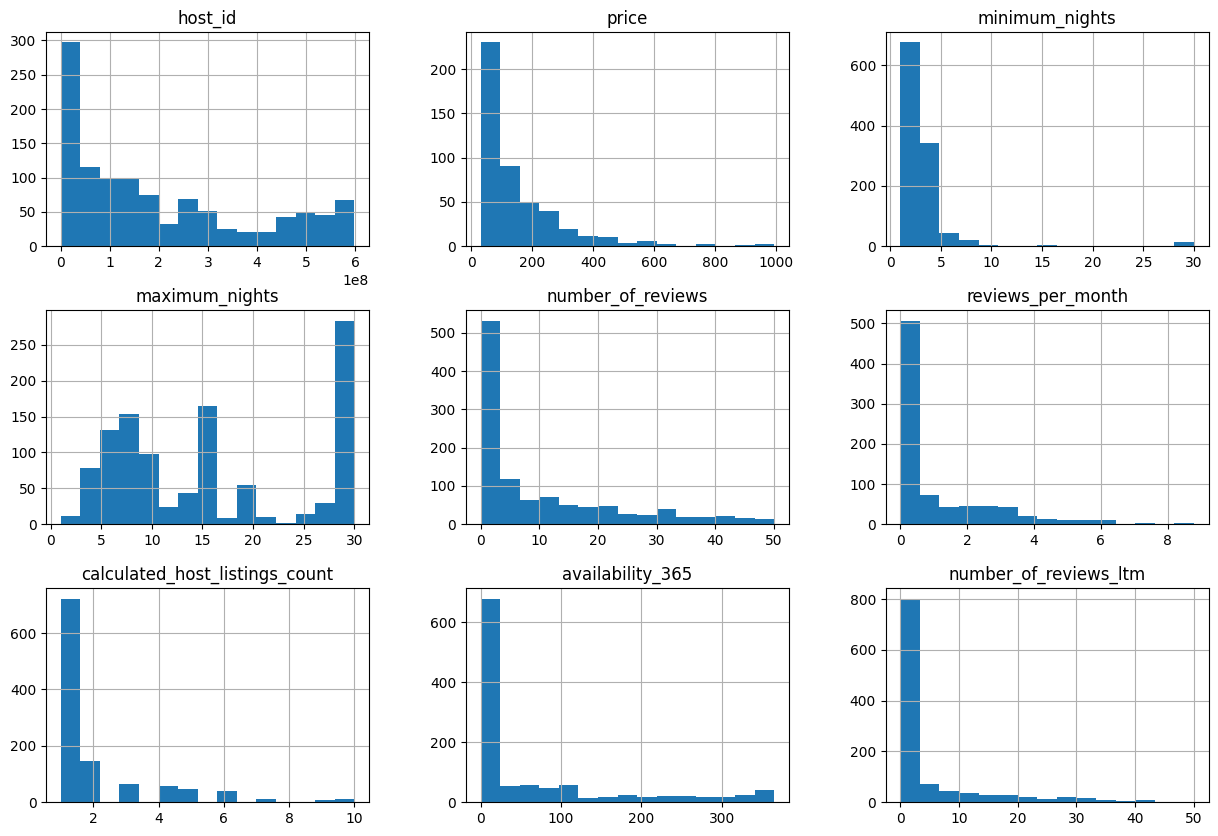

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.maximum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 10].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

A análise de correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal. Essa medida de grau de relação é medida através de coeficientes.

O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “ρ de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

* Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

* Correlação negativa: quando duas variáveis que possuem correlação, mas quando uma variável cresce a outra decresce, ou vice-versa;

* Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

Podemos interpretar os valores que ρ pode assumir, da seguinte forma*:

* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042599,0.327674,0.008041,-0.262495,0.165521,0.305140
minimum_nights,0.042599,1.000000,0.251740,-0.088880,-0.062103,-0.042606,0.022343
maximum_nights,0.327674,0.251740,1.000000,0.168037,0.090127,0.204294,0.341343
number_of_reviews,0.008041,-0.088880,0.168037,1.000000,0.325081,0.051073,0.194708
reviews_per_month,-0.262495,-0.062103,0.090127,0.325081,1.000000,0.135370,0.274307
calculated_host_listings_count,0.165521,-0.042606,0.204294,0.051073,0.135370,1.000000,0.342771
availability_365,0.305140,0.022343,0.341343,0.194708,0.274307,0.342771,1.000000


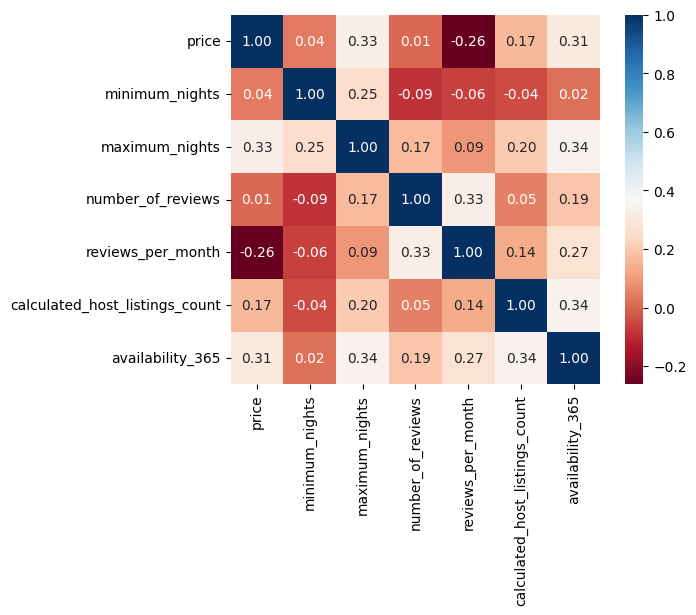

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Private room,899
Entire home/apt,201
Shared room,9
Hotel room,1


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Private room,0.809910
Entire home/apt,0.181081
Shared room,0.008108
Hotel room,0.000901


Pela análise acima, podemos observar que o tipo de locação mais oferecido é aluguel de quarto privado, representando quase 81%.

### **Q6. Qual a localidade mais cara de Barcelona?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhood_group_cleansed*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood_group_cleansed']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood_group_cleansed,
Eixample,191.534351
Gràcia,188.444444
Sant Martí,161.723404
Ciutat Vella,150.408000
Sarrià-Sant Gervasi,147.454545
Sants-Montjuïc,127.402985
Horta-Guinardó,111.619048
Sant Andreu,91.153846
Les Corts,82.714286


Podemos observar que os preços em Eixample e Gràcia são bem próximos, assim como entre Ciutat Vella e Sarrià-Sant Gervasi. Por outro lado, vemos bairros com preço muito abaixo dos demais, como em: Sant Andreu, Les Corts e Nou Barris.

Para uma pessoa que não conhece Bracelona, não é possível determinar se vale a pena escolher os bairros muito mais baratos que os demais, pois deve-se considerar a proximidade com pontos turísticos e, além da distância, o tempo e o custo de deslocamento na cidade.

In [ ]:
# Ver a quantidade de imóveis por bairro
df_clean.neighbourhood_group_cleansed.value_counts()



,count
neighbourhood_group_cleansed,
Eixample,321
Ciutat Vella,267
Sants-Montjuïc,137
Sant Martí,113
Gràcia,109
Horta-Guinardó,52
Sarrià-Sant Gervasi,32
Sant Andreu,32
Nou Barris,24


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

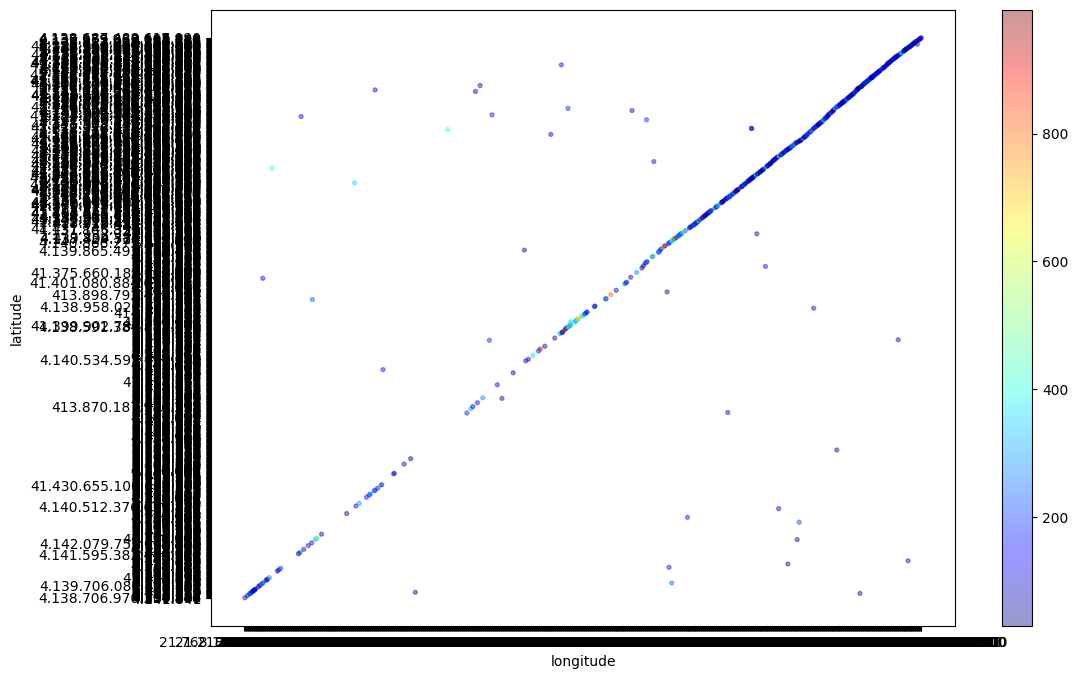

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também observamos bairros com preço muito abaixo dos demais.